Introduction

Insurance froud is the biggest problem in insurance industry.Under This project we will predict the claim is genuine or fraud.The dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

Dataset


The dataset used in this project is automobile_insurance_fraud.csv that contains 1000 instances with 40 features months_as_customer, age, policy_number, policy_bind_date,policy_state, policy_csl,policy_deductable,
policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,
insured_relationship, capitalgains,capitalloss,incident_date,incident_type,collision_type,incident_severity,
authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehic_involved, property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim, property_claim, vehicle_claim, auto_make,auto_model, auto_year, fraud_reported, _c39.

In [97]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

Uploading dataset

In [98]:
df=pd.read_csv("automobile_insurance_fraud.csv")

In [99]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset has 1000 rows and 40 columns

In [100]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [101]:
df.keys

<bound method NDFrame.keys of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_ann

In [102]:
df.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_a

In [103]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset is mixed with integers, object and float type of data

In [104]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

I am removing variable _c39 as all values in captioned columns are Nan. Hence it will not usefull in model building

In [105]:
df.drop(['_c39'],axis=1, inplace= True)

In [106]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In most of the columns there is not much diffrence in mean and 50% and min-Max values.So most of columns does not have outliers and skewness.

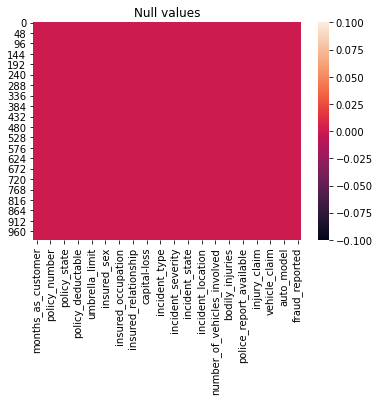

In [107]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [108]:
categorical_columns=['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
print(categorical_columns)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


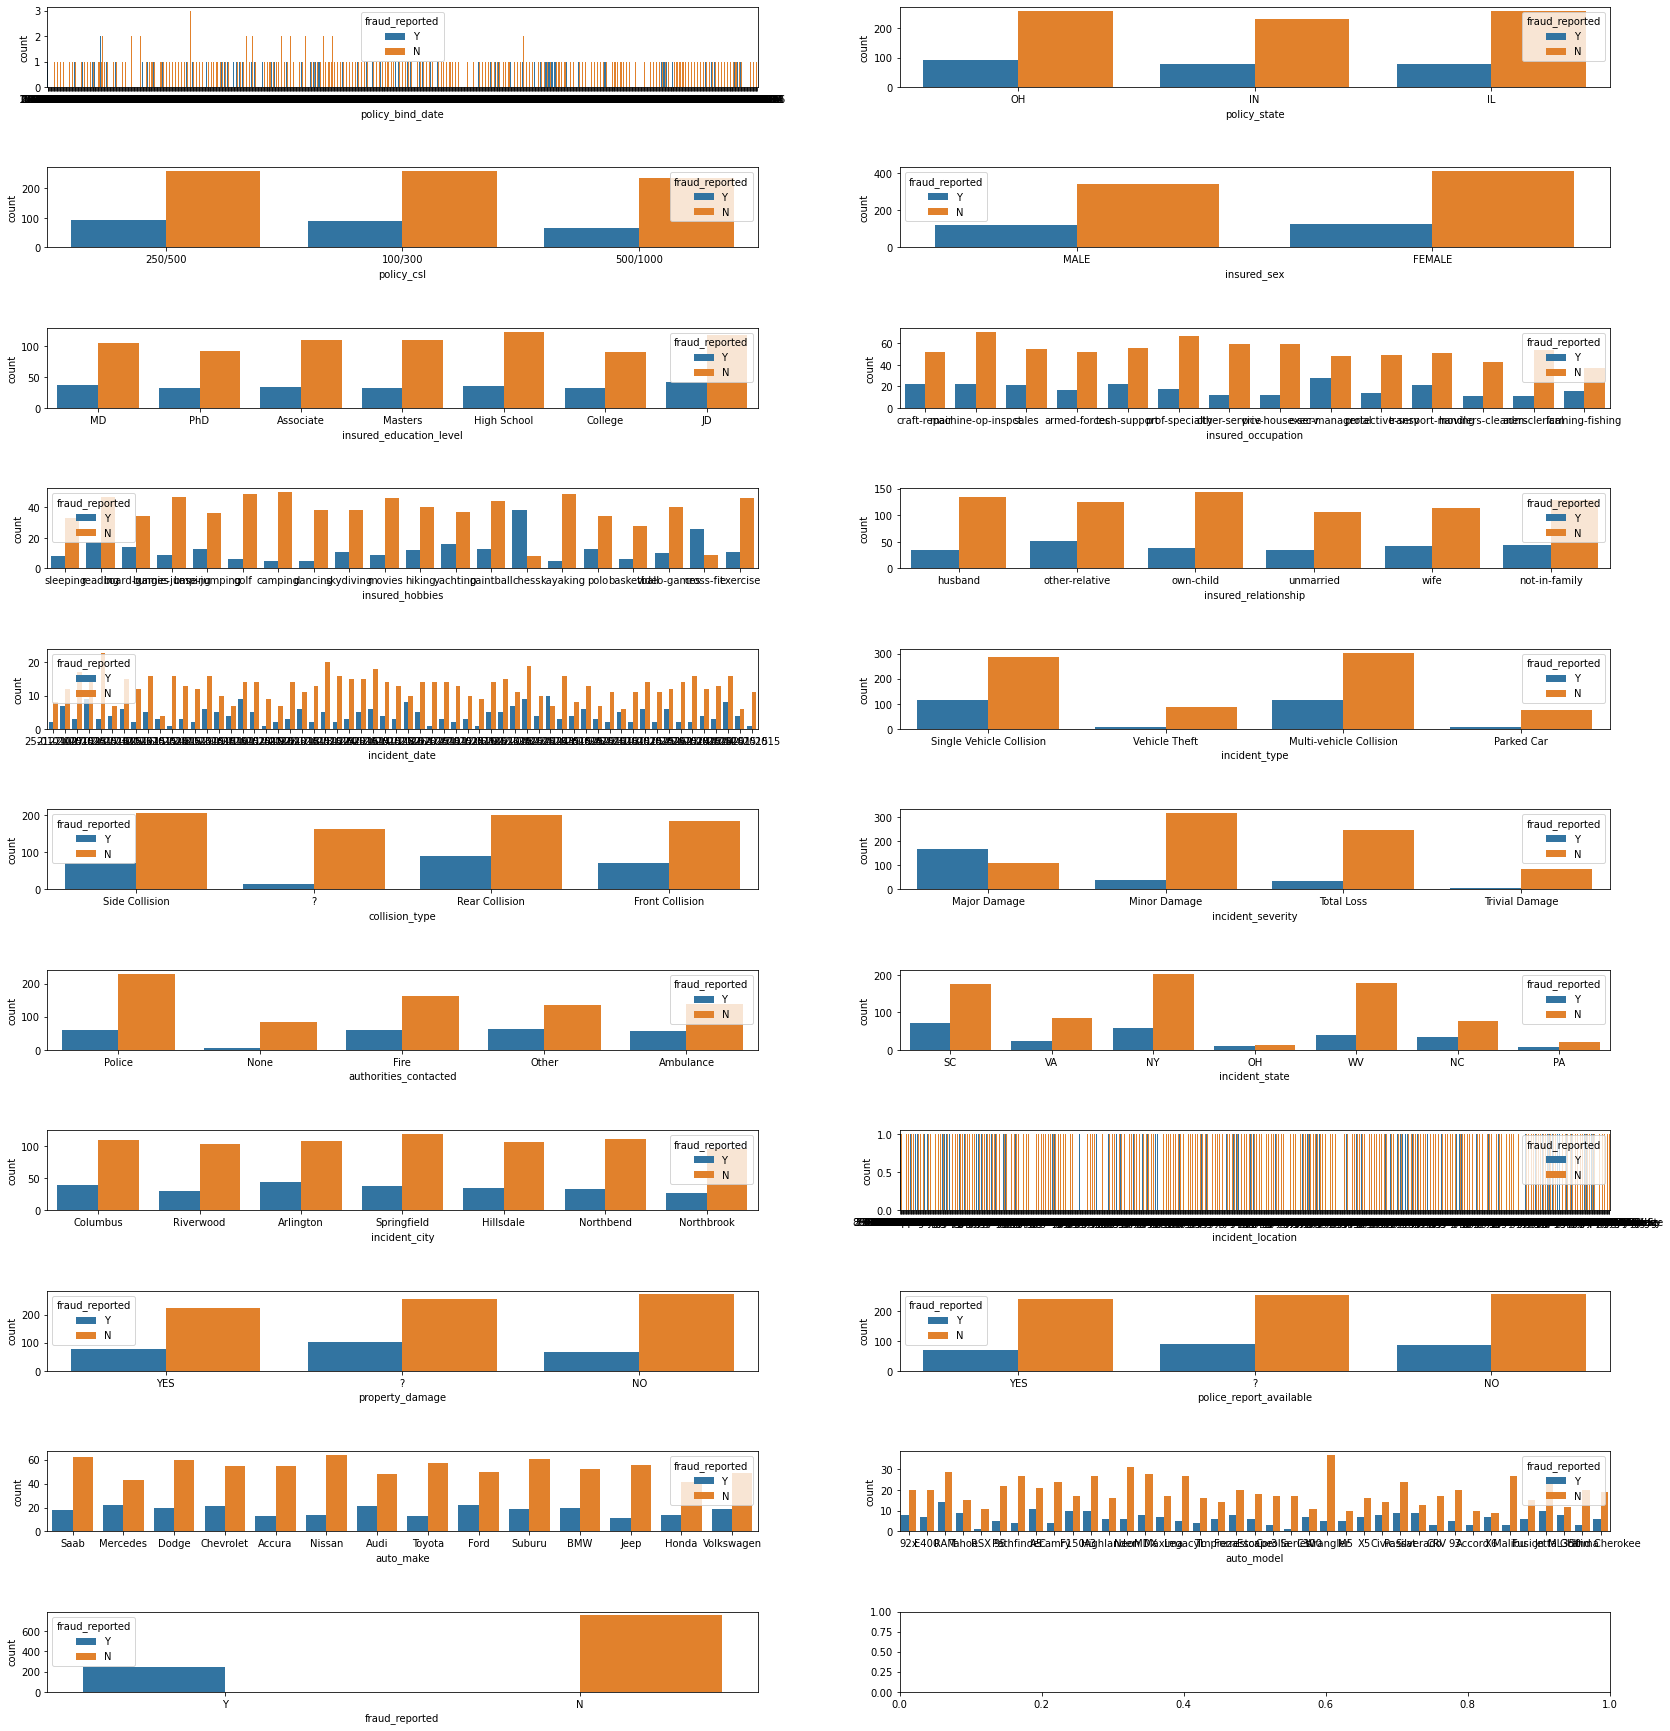

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes=plt.subplots(11,2,figsize=(28,31))
for idx,cat_col in enumerate(categorical_columns):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='fraud_reported',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

The graphs shows that where property was damaged the percentage of fraud was less than where property damage was absent.
The Jeep is the auto make where the lowest fraud claims were reported campare to other auto made.
Riverwood is the city where lowest fraud claims made in campaire to other city.Though there is not dmuch correlation between city and fraud claims.
The number of frauds were less where the policy authority was involved.
In case of side collision the chances of fraud less the author collision type.
The chances of fraud is heigher where insured hobby is chess compaire to other hobbies.
There is not much correlation with education as the fraud was reported in all level of education level.
Most of the fraud was reported in 250/500 policy_csl.
The fake claim was reported even after policy report laduged so there is not much correlation whether policy report available or not.
Most of the fraud was reported in SC state.
No of fake claims were observed in major damaged cases.
Most of the cases was reported in single and multi vehicle collision.



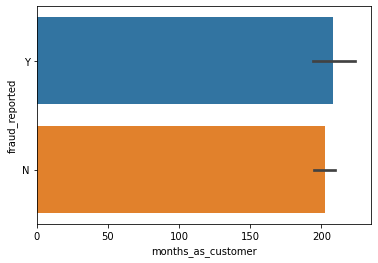

In [110]:
sns.barplot(x="months_as_customer",y="fraud_reported",data=df)

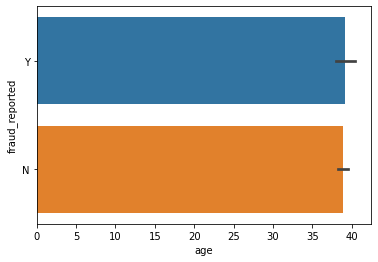

In [111]:
sns.barplot(x="age",y="fraud_reported",data=df)

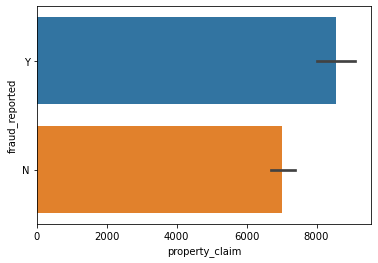

In [112]:
sns.barplot(x="property_claim",y="fraud_reported",data=df)

Age,Month as customer,property claim are not much correlated with fraud claims. They have the very moderate relation in context with detecting fraud claims

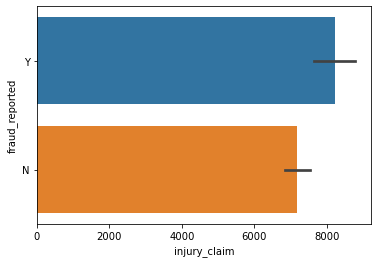

In [113]:
sns.barplot(x="injury_claim",y="fraud_reported",data=df)

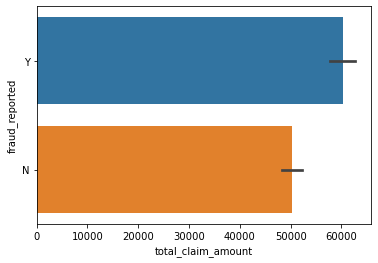

In [114]:
sns.barplot(x="total_claim_amount",y="fraud_reported",data=df)

The graphs shows that the fraud was reported in 60000K

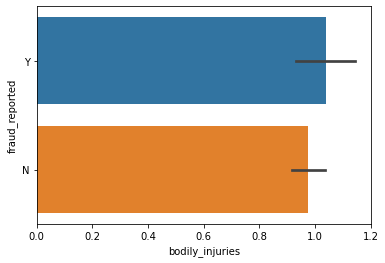

In [115]:
sns.barplot(x="bodily_injuries",y="fraud_reported",data=df)

There are cases where are bodily injuries present but the claim was fake. Injuries are not much correlated with fraud claims

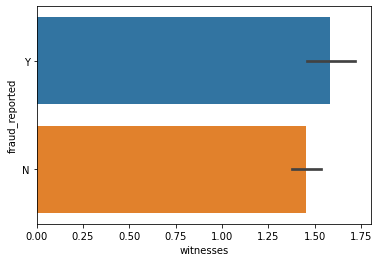

In [116]:
sns.barplot(x="witnesses",y="fraud_reported",data=df)

In [117]:
There is not much correlation between witnesses and fraud reported.

SyntaxError: invalid syntax (<ipython-input-117-42f193c8bfa5>, line 1)

In [ ]:
for col in df.select_dtypes(['object']).columns: #Checking categorical data
    print(col, ':', sorted(df[col].unique()))

In [ ]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

In [ ]:
var_cat = var_cat.columns.tolist() #Changing categorical data into numericat
var_cat = ['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_hobbies','insured_relationship','incedent_date','incedent_type','incident_severity','authorityes_contracted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported','collision_type','insured_occupation']


var_cat
['policy_bind_date','policy_state','policy_csl','insured_sex','insured_education_level','insured_hobbies','insured_relationship','incident_date','incident_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported','collision_type','insured_occupation']


In [ ]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical with the help of Label Encoder
LE=LabelEncoder()
df["policy_bind_date"]=LE.fit_transform(df["policy_bind_date"])
df["policy_state"]=LE.fit_transform(df["policy_state"])
df["policy_csl"]=LE.fit_transform(df["policy_csl"])
df["insured_sex"]=LE.fit_transform(df["insured_sex"])
df["insured_education_level"]=LE.fit_transform(df["insured_education_level"])
df["insured_hobbies"]=LE.fit_transform(df["insured_hobbies"])
df["insured_relationship"]=LE.fit_transform(df["insured_relationship"])

df["incident_type"]=LE.fit_transform(df["incident_type"])
df["incident_severity"]=LE.fit_transform(df["incident_severity"])
df["authorities_contacted"]=LE.fit_transform(df["authorities_contacted"])
df["incident_state"]=LE.fit_transform(df["incident_state"])
df["incident_city"]=LE.fit_transform(df["incident_city"])
df["property_damage"]=LE.fit_transform(df["property_damage"])
df["police_report_available"]=LE.fit_transform(df["police_report_available"])
df["auto_make"]=LE.fit_transform(df["auto_make"])
df["auto_model"]=LE.fit_transform(df["auto_model"])
df["fraud_reported"]=LE.fit_transform(df["fraud_reported"])
df["incident_location"]=LE.fit_transform(df["incident_location"])
df["incident_date"]=LE.fit_transform(df["incident_date"])
df["insured_occupation"]=LE.fit_transform(df["insured_occupation"])
df["collision_type"]=LE.fit_transform(df["collision_type"])

In [ ]:
dfcor=df.corr()
dfcor

In [ ]:
plt.figure(figsize=(20,22))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

most of the columns have either very moderate or negative correlation with target variable.

In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix["fraud_reported"].sort_values(ascending=False)

I am dropping the columns Policy bind date, Incident date ,policy number, and incident state as i feel they are not contributing in predicting model.As i have incident city column thats why i am droping incident state.

In [ ]:
df.drop(['policy_bind_date'],axis=1, inplace= True)
df.drop(['incident_date'],axis=1, inplace= True)
df.drop(['policy_number'],axis=1, inplace= True)
df.drop(['incident_state'],axis=1, inplace= True)        

In [ ]:
#Plotting boxplots to check outliers
df.iloc[:,0:31].boxplot(figsize=[28,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

umbrella limit has the heighest outliers i am removing it with the heflp of Zscore

In [ ]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

In [ ]:
loss_percent=(1000-980)/1000*100
print(loss_percent)

In [ ]:
df.skew() #Checking skewness

The data set is not much skewed so i am not removing skewness.

In [ ]:
# spliting the independent and target variables in x and y
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

scalling dataset with the help of standardscaller

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

Training,testing,validating and hyper tuning the model

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=33)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Using cross val to validate the model accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Minimum difference in accuracy and cross validation score is for DecissionTreeClassifier so this is our best model

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [ ]:
y_pred_prob

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecissionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecissionTreeClassifier')
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))

In [ ]:
print(auc_score)

In [ ]:
from sklearn.model_selection import GridSearchCV # Hyper Tuning model

In [ ]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_ #Printing the best parameter found by GridSearch

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test,GCV_pred)

After Hyper tuning the model our best accuracy is 86%

In [ ]:
import joblib #Saving model
joblib.dump(dt,"insurance_fraud.csv.obj")


In [ ]:
p=joblib.load("insurance_fraud.csv.obj")

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [ ]:
df_com